# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# **Load Dataset**

In [2]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_SobatMeterai_1.csv")
df.head()

,userName,score,at,content
0,Zia Slamat,5,2024-09-06 01:34:11,"Alhamdulillah,,setelah sekian hari drama saldo..."
1,Florentina Kuway,4,2024-09-06 01:33:43,Untuk sekarang ini dulu
2,Muhammad defri Wahyudi,1,2024-09-06 01:31:09,Untuk pembelian matrai muda dan gampang. Tetap...
3,Fran Horas Samosir,1,2024-09-06 01:29:40,Di hubungi dari helpdesk WhatsApp gak ada solu...
4,Chandra Aditya Novianto,4,2024-09-06 01:24:35,Lumayan sih tapi gk sekalian bisa scan materai...


In [3]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,"Alhamdulillah,,setelah sekian hari drama saldo..."
1,Untuk sekarang ini dulu
2,Untuk pembelian matrai muda dan gampang. Tetap...
3,Di hubungi dari helpdesk WhatsApp gak ada solu...
4,Lumayan sih tapi gk sekalian bisa scan materai...
...,...
1495,Kok saya coba Tidak sesuai dengan tutor yah?
1496,Mantap
1497,Aplikasi super lemot
1498,"yang bot doang, konsumen tidak di dengarkan pa..."


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1500 non-null   object
dtypes: object(1)
memory usage: 11.8+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()


,content
count,1500
unique,1289
top,Mantap
freq,58


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(1500, 1)

In [7]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong

df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

,0
content,0


In [11]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(1289, 1)

In [12]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(lambda x: clean_review_text(remove_emojis(x))).str.lower()
df

,content,cleaning
0,"Alhamdulillah,,setelah sekian hari drama saldo...",alhamdulillahsetelah sekian hari drama saldo k...
1,Untuk sekarang ini dulu,untuk sekarang ini dulu
2,Untuk pembelian matrai muda dan gampang. Tetap...,untuk pembelian matrai muda dan gampang tetapi...
3,Di hubungi dari helpdesk WhatsApp gak ada solu...,di hubungi dari helpdesk whatsapp gak ada solu...
4,Lumayan sih tapi gk sekalian bisa scan materai...,lumayan sih tapi gk sekalian bisa scan materai...
...,...,...
1492,Mudah digunakan. Yang terpenting materai Valid...,mudah digunakan yang terpenting materai valid ...
1494,Mantap. Lumayan murah dan cepat,mantap lumayan murah dan cepat
1495,Kok saya coba Tidak sesuai dengan tutor yah?,kok saya coba tidak sesuai dengan tutor yah
1497,Aplikasi super lemot,aplikasi super lemot


# **Normalization**

In [15]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "woila" : "",
        "mendem" : "tertekan",
        "sepertiurangan" : "",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "bguss" : "bagus",
        "yyuy" : "",
        "sakarag" : "sekarang",
        "aflikasi" : "aplikasi",
        "sengkap" : "lengkap",
        "mntapp" : "mantap",
        "lncar" : "lancar",
        "pdhl" : "padahal",
        "gaes" : "guys",
        "kelen" : "kalian",
        "grgr" : "gara gara",
        "mnta" : "minta",
        "pasilitas" : "fasilitas",
        "narutodan" : "",
        "wwconm moktar" : "",
        "ampunsaya" : "ampun saya",
        "mantapz" : "mantap",
        "dgan lyanananya" : "dengan layanannya",
        "sbn" : "saham",
        "maw" : "mau",
        "ajh" : "aja",
        "ingglish" : "ingrris",
        "ratinh" : "rating",
        "bnaget" : "banget",
        "m a" : "",
        "mebamtu" : "membantu",
        "gusa" : "ngga usah",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,"Alhamdulillah,,setelah sekian hari drama saldo...",alhamdulillahsetelah sekian hari drama saldo k...,alhamdulillahsetelah sekian hari drama saldo k...
1,Untuk sekarang ini dulu,untuk sekarang ini dulu,untuk sekarang ini dulu
2,Untuk pembelian matrai muda dan gampang. Tetap...,untuk pembelian matrai muda dan gampang tetapi...,untuk pembelian matrai muda dan gampang tetapi...
3,Di hubungi dari helpdesk WhatsApp gak ada solu...,di hubungi dari helpdesk whatsapp gak ada solu...,di hubungi dari helpdesk whatsapp gak ada solu...
4,Lumayan sih tapi gk sekalian bisa scan materai...,lumayan sih tapi gk sekalian bisa scan materai...,lumayan sih tapi gk sekalian bisa scan materai...
...,...,...,...
1492,Mudah digunakan. Yang terpenting materai Valid...,mudah digunakan yang terpenting materai valid ...,mudah digunakan yang terpenting materai valid ...
1494,Mantap. Lumayan murah dan cepat,mantap lumayan murah dan cepat,mantap lumayan murah dan cepat
1495,Kok saya coba Tidak sesuai dengan tutor yah?,kok saya coba tidak sesuai dengan tutor yah,kok saya coba tidak sesuai dengan tutor yah
1497,Aplikasi super lemot,aplikasi super lemot,aplikasi super lemot


# **Stopwords**

In [16]:
# Menginstall Library Sastrawi

!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.2 MB/s eta 0:00:00


In [17]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dengan", "tidak", "aku", "engkau", "kamu", "beliau", "kalian", "kita", "sini", "situ", "sana",
                   "begini", "bapak", "ibu", "saudara", "tuan", "nyonya", "nona", "siapa", "apa", "mana", "kapan",
                   "bagaimana", "meski", "walaupun", "seandainya", "andai", "jikalau", "kini", "dulu", "sekarang",
                   "tadi", "besok", "lusa", "satu", "tiga", "pertama", "kedua", "ketiga", "sangat", "sekali", "terlalu",
                   "cukup", "lah", "tah", "yang", "nya", "untuk", "dan", "di", "ada", "saya", "ini", "banyak", "itu", "bisa",
                   "gak", "buat", "ke", "ga", "suka", "karena", "banget", "hal", "dalam", "amat", "sudah", "tapi", "lagi", "tq",
                   "disini", "dari", "ada", "gk", "kok"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(more_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,"Alhamdulillah,,setelah sekian hari drama saldo...",alhamdulillahsetelah sekian hari drama saldo k...,alhamdulillahsetelah sekian hari drama saldo k...,alhamdulillahsetelah sekian hari drama saldo k...
1,Untuk sekarang ini dulu,untuk sekarang ini dulu,untuk sekarang ini dulu,sekarang dulu
2,Untuk pembelian matrai muda dan gampang. Tetap...,untuk pembelian matrai muda dan gampang tetapi...,untuk pembelian matrai muda dan gampang tetapi...,pembelian matrai muda gampang tetapi saat dibu...
3,Di hubungi dari helpdesk WhatsApp gak ada solu...,di hubungi dari helpdesk whatsapp gak ada solu...,di hubungi dari helpdesk whatsapp gak ada solu...,hubungi helpdesk whatsapp ada solusi sama
4,Lumayan sih tapi gk sekalian bisa scan materai...,lumayan sih tapi gk sekalian bisa scan materai...,lumayan sih tapi gk sekalian bisa scan materai...,lumayan sih gk sekalian scan materai
...,...,...,...,...
1492,Mudah digunakan. Yang terpenting materai Valid...,mudah digunakan yang terpenting materai valid ...,mudah digunakan yang terpenting materai valid ...,mudah digunakan terpenting materai valid semua
1494,Mantap. Lumayan murah dan cepat,mantap lumayan murah dan cepat,mantap lumayan murah dan cepat,mantap lumayan murah cepat
1495,Kok saya coba Tidak sesuai dengan tutor yah?,kok saya coba tidak sesuai dengan tutor yah,kok saya coba tidak sesuai dengan tutor yah,saya coba sesuai tutor yah
1497,Aplikasi super lemot,aplikasi super lemot,aplikasi super lemot,aplikasi super lemot


# **Tokenize**

In [18]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,"Alhamdulillah,,setelah sekian hari drama saldo...",alhamdulillahsetelah sekian hari drama saldo k...,alhamdulillahsetelah sekian hari drama saldo k...,alhamdulillahsetelah sekian hari drama saldo k...,"[alhamdulillahsetelah, sekian, hari, drama, sa..."
1,Untuk sekarang ini dulu,untuk sekarang ini dulu,untuk sekarang ini dulu,sekarang dulu,"[sekarang, dulu]"
2,Untuk pembelian matrai muda dan gampang. Tetap...,untuk pembelian matrai muda dan gampang tetapi...,untuk pembelian matrai muda dan gampang tetapi...,pembelian matrai muda gampang tetapi saat dibu...,"[pembelian, matrai, muda, gampang, tetapi, saa..."
3,Di hubungi dari helpdesk WhatsApp gak ada solu...,di hubungi dari helpdesk whatsapp gak ada solu...,di hubungi dari helpdesk whatsapp gak ada solu...,hubungi helpdesk whatsapp ada solusi sama,"[hubungi, helpdesk, whatsapp, ada, solusi, sama]"
4,Lumayan sih tapi gk sekalian bisa scan materai...,lumayan sih tapi gk sekalian bisa scan materai...,lumayan sih tapi gk sekalian bisa scan materai...,lumayan sih gk sekalian scan materai,"[lumayan, sih, gk, sekalian, scan, materai]"
...,...,...,...,...,...
1492,Mudah digunakan. Yang terpenting materai Valid...,mudah digunakan yang terpenting materai valid ...,mudah digunakan yang terpenting materai valid ...,mudah digunakan terpenting materai valid semua,"[mudah, digunakan, terpenting, materai, valid,..."
1494,Mantap. Lumayan murah dan cepat,mantap lumayan murah dan cepat,mantap lumayan murah dan cepat,mantap lumayan murah cepat,"[mantap, lumayan, murah, cepat]"
1495,Kok saya coba Tidak sesuai dengan tutor yah?,kok saya coba tidak sesuai dengan tutor yah,kok saya coba tidak sesuai dengan tutor yah,saya coba sesuai tutor yah,"[saya, coba, sesuai, tutor, yah]"
1497,Aplikasi super lemot,aplikasi super lemot,aplikasi super lemot,aplikasi super lemot,"[aplikasi, super, lemot]"


# **Stemming**

In [19]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

df['steamming'] = df['tokenized'].apply(stemming)

df['steamming'].to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_SobatMeterai_1.csv', index = False)


In [20]:
df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_SobatMeterai_1.csv', encoding = 'latin1')
df_steamming


,steamming
0,alhamdulillahsetelah sekian hari drama saldo p...
1,sekarang dulu
2,beli matra muda gampang tetapi saat bubuh gamp...
3,hubung helpdesk whatsapp ada solusi sama
4,lumayan sih gk sekali scan materai
...,...
1284,mudah guna penting materai valid semua
1285,mantap lumayan murah cepat
1286,saya coba sesuai tutor yah
1287,aplikasi super lot


# **Translate**

In [21]:
# Menginstall Library easynmt

!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.5-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.5-py3-none-any.whl (240 kB)
  Created wheel for easynmt: filename=EasyNMT-2.0.2-py3-none-any.whl size=19898 sha256=a7ac2c0f8b6550cbd87a731dfd0277ab3297160a9db17fd133d018c4e32fc568
  Stored in directory: /root/.cache/pip/wheels/ab/55/72/aba4face7eac1d7750ca700aa1797b135fb8915e949da504cc
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4246563 sha256=9f43b33fd0170bc498f3cde3fd599077079dea080a196d95787ee976b659c52c
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built easynmt fasttext


In [22]:
# Import Library yang dibutuhkan

import pandas as pd
from easynmt import EasyNMT

# Load Data Hasil Stemming

df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_SobatMeterai_1.csv', encoding = 'latin1')

# Menentukan Asal & Target Bahasa yang akan diterjemahkan

source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

# Load Model EasyMNT

model = EasyNMT('opus-mt')  # You can choose a different model name here

# Imputing NaN Values

df_values = df_steamming.fillna(method = 'pad')

# Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

df_values['steamming_en'] = df_values['steamming'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_SobatMeterai_1.csv')


11.9kB [00:00, 11.0MB/s]                   
<ipython-input-22-71343c2fd16c>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values = df_steamming.fillna(method = 'pad')
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [23]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_SobatMeterai_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,alhamdulillahsetelah sekian hari drama saldo p...,"fontcolor="" # FFFF00""alhamdulillahafteralldays..."
1,sekarang dulu,"Now, now, now."
2,beli matra muda gampang tetapi saat bubuh gamp...,"Buying a young matra is easy, but when you dow..."
3,hubung helpdesk whatsapp ada solusi sama,link helpdesk whatsapp there is the same solution
4,lumayan sih gk sekali scan materai,It's not so bad. It's not so bad. It's not so ...
...,...,...
1284,mudah guna penting materai valid semua,easy important materai valid all
1285,mantap lumayan murah cepat,"fontcolor="" # FFFF00""stating fontcolor="" # FFF..."
1286,saya coba sesuai tutor yah,I'm trying to fit the tutor. Yeah.
1287,aplikasi super lot,super lot application


# **Labeling**

In [24]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_SobatMeterai_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,alhamdulillahsetelah sekian hari drama saldo p...,"fontcolor="" # FFFF00""alhamdulillahafteralldays..."
1,sekarang dulu,"Now, now, now."
2,beli matra muda gampang tetapi saat bubuh gamp...,"Buying a young matra is easy, but when you dow..."
3,hubung helpdesk whatsapp ada solusi sama,link helpdesk whatsapp there is the same solution
4,lumayan sih gk sekali scan materai,It's not so bad. It's not so bad. It's not so ...
...,...,...
1284,mudah guna penting materai valid semua,easy important materai valid all
1285,mantap lumayan murah cepat,"fontcolor="" # FFFF00""stating fontcolor="" # FFF..."
1286,saya coba sesuai tutor yah,I'm trying to fit the tutor. Yeah.
1287,aplikasi super lot,super lot application


In [25]:
# Menginstall Library Text-Blob, Worldcould

!pip install textblob
!pip install wordcloud

In [26]:
# Import Library yang dibutuhkan

from textblob import TextBlob

# Labeling With TextBlob

data_review = list(df_values['steamming_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 435
Netral = 610
Negatif = 244

Total Data Seluruhnya : 1289


In [27]:
# Melihat Status Sentimen

df_values['sentimen'] = status
df_values

,steamming,steamming_en,sentimen
0,alhamdulillahsetelah sekian hari drama saldo p...,"fontcolor="" # FFFF00""alhamdulillahafteralldays...",Netral
1,sekarang dulu,"Now, now, now.",Netral
2,beli matra muda gampang tetapi saat bubuh gamp...,"Buying a young matra is easy, but when you dow...",Positif
3,hubung helpdesk whatsapp ada solusi sama,link helpdesk whatsapp there is the same solution,Netral
4,lumayan sih gk sekali scan materai,It's not so bad. It's not so bad. It's not so ...,Negatif
...,...,...,...
1284,mudah guna penting materai valid semua,easy important materai valid all,Positif
1285,mantap lumayan murah cepat,"fontcolor="" # FFFF00""stating fontcolor="" # FFF...",Netral
1286,saya coba sesuai tutor yah,I'm trying to fit the tutor. Yeah.,Positif
1287,aplikasi super lot,super lot application,Positif


In [28]:
# Mengimplementasikan Variabel Data Final

data_final = df_values

# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



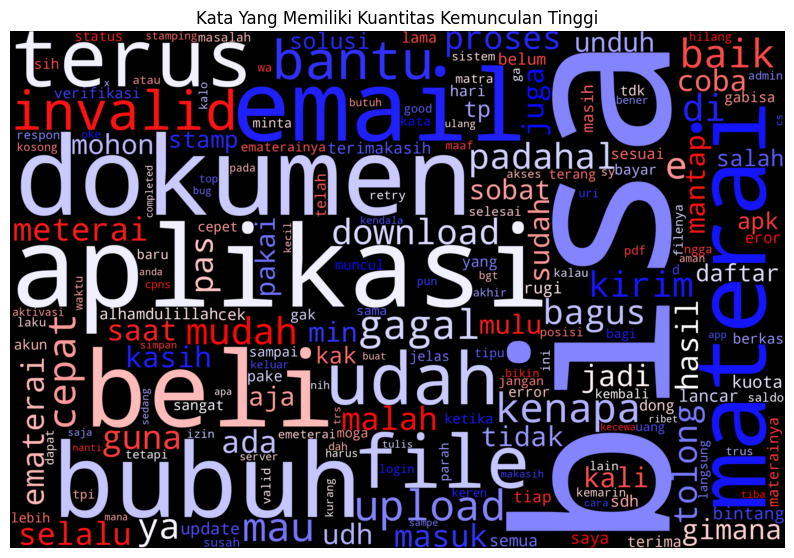

In [29]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in data_final['steamming']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)

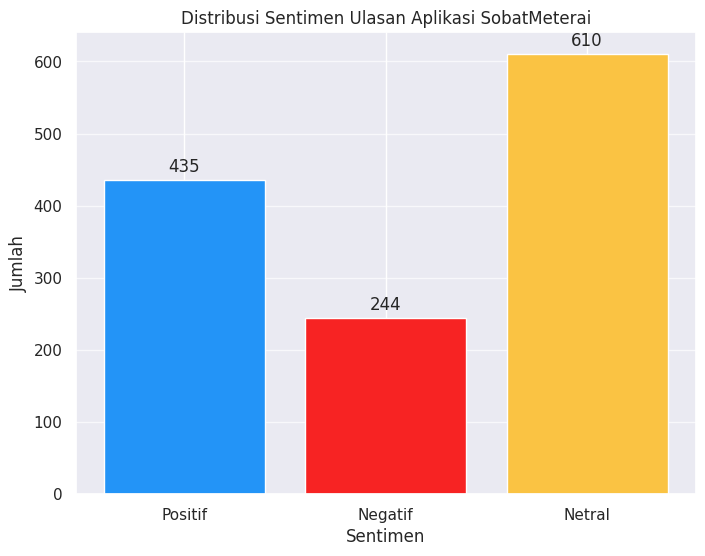

In [30]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SobatMeterai")

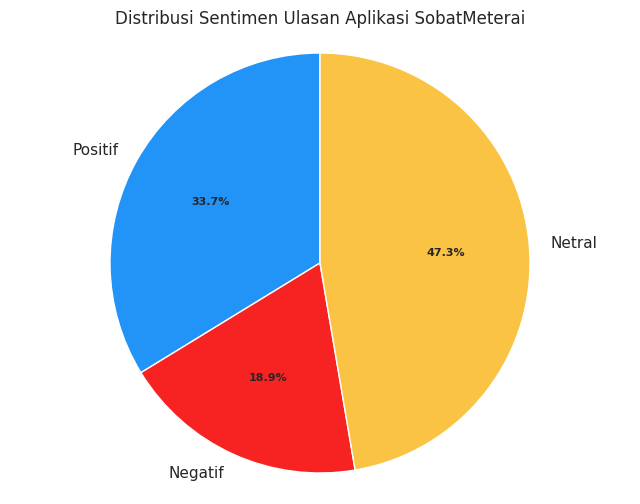

In [31]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SobatMeterai")

In [32]:
# Menghapus Sentimen Netral

data_final = data_final[data_final['sentimen'] != 'Netral']
data_final

,steamming,steamming_en,sentimen
2,beli matra muda gampang tetapi saat bubuh gamp...,"Buying a young matra is easy, but when you dow...",Positif
4,lumayan sih gk sekali scan materai,It's not so bad. It's not so bad. It's not so ...,Negatif
7,simple mudah sangat bantu,Simple. Easy. Very helpful.,Positif
8,bintang ya aplikasi memang bantu beli serta bu...,"fontcolor="" # FFFF00""staryes fontcolor="" # FFF...",Positif
9,beli ematerai cepat bumbu kenapa telah bumbu e...,Buy an ematerai quick seasoning why has a seas...,Positif
...,...,...,...
1282,mudah,Easy.,Positif
1284,mudah guna penting materai valid semua,easy important materai valid all,Positif
1286,saya coba sesuai tutor yah,I'm trying to fit the tutor. Yeah.,Positif
1287,aplikasi super lot,super lot application,Positif


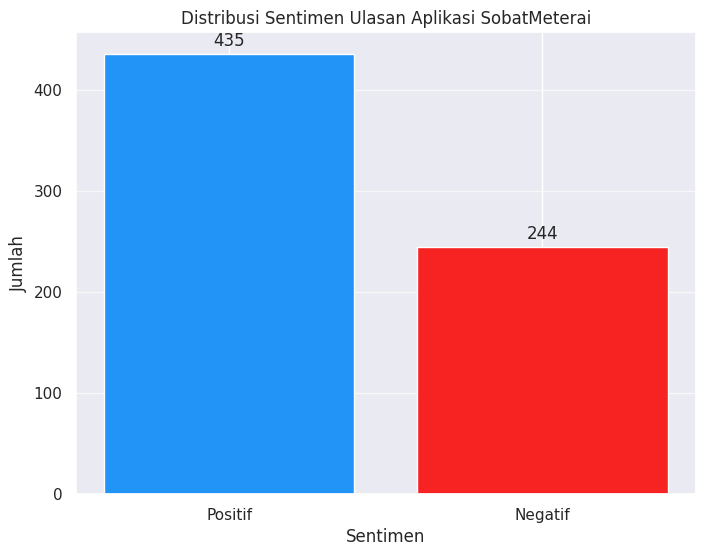

In [33]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SobatMeterai")

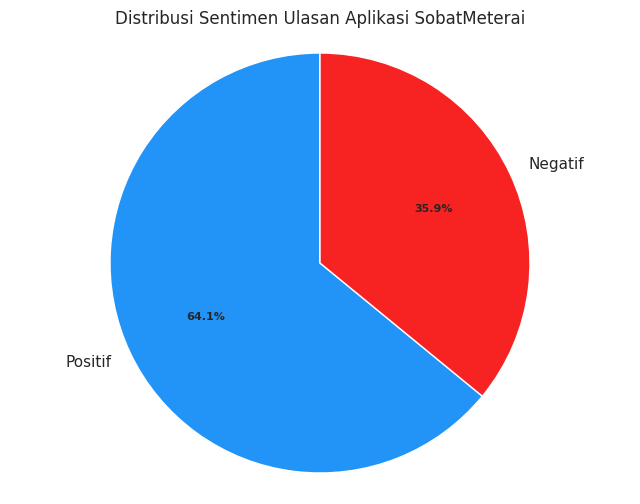

In [34]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi SobatMeterai")

In [35]:
# Replace Data Sentimen

data_final = data_final.replace({'Positif':0, 'Negatif':1})
data_final

,steamming,steamming_en,sentimen
2,beli matra muda gampang tetapi saat bubuh gamp...,"Buying a young matra is easy, but when you dow...",0
4,lumayan sih gk sekali scan materai,It's not so bad. It's not so bad. It's not so ...,1
7,simple mudah sangat bantu,Simple. Easy. Very helpful.,0
8,bintang ya aplikasi memang bantu beli serta bu...,"fontcolor="" # FFFF00""staryes fontcolor="" # FFF...",0
9,beli ematerai cepat bumbu kenapa telah bumbu e...,Buy an ematerai quick seasoning why has a seas...,0
...,...,...,...
1282,mudah,Easy.,0
1284,mudah guna penting materai valid semua,easy important materai valid all,0
1286,saya coba sesuai tutor yah,I'm trying to fit the tutor. Yeah.,0
1287,aplikasi super lot,super lot application,0


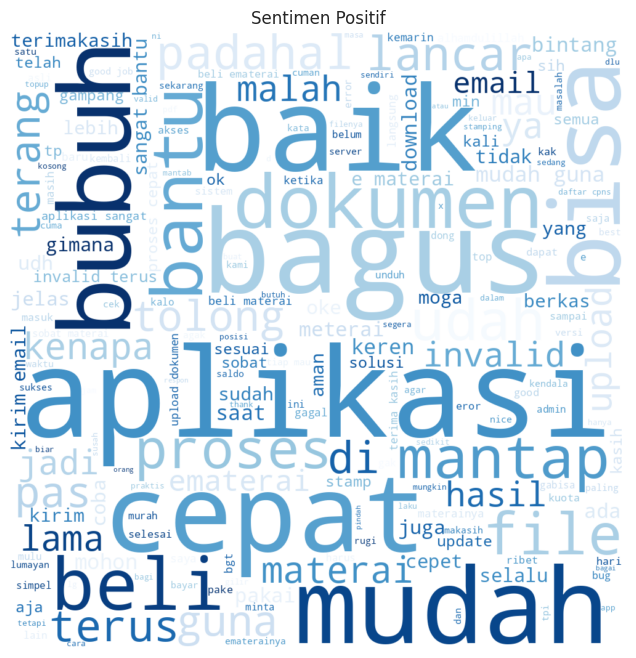

In [36]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data_final[data_final['sentimen'] == 0]
data_negatif = data_final[data_final['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['steamming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

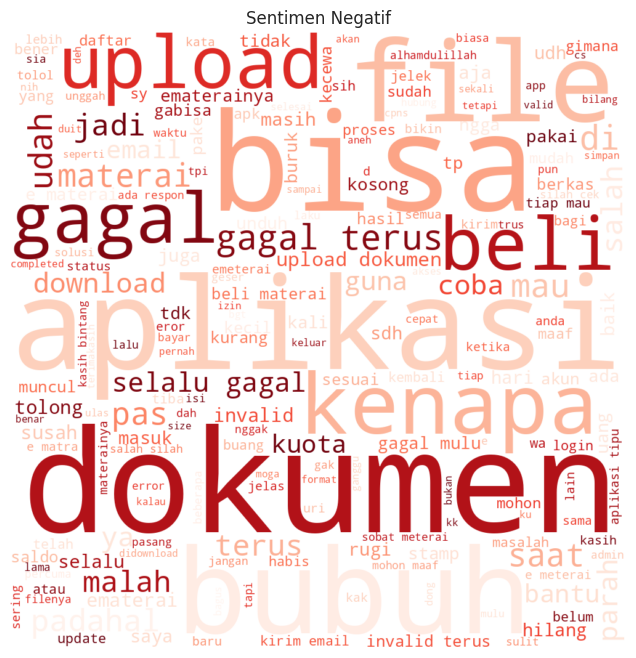

In [37]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['steamming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

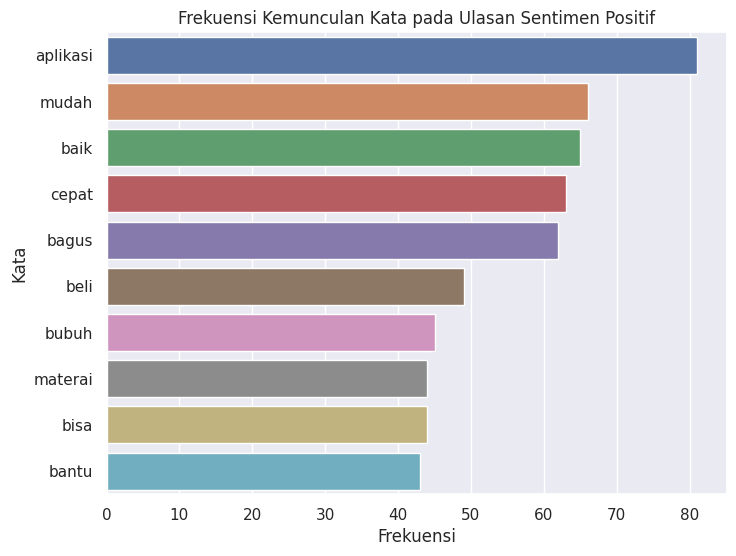

In [38]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data_final[data_final['sentimen'] == 0]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [39]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

    kata  frekuensi
aplikasi         81
   mudah         66
    baik         65
   cepat         63
   bagus         62
    beli         49
   bubuh         45
 materai         44
    bisa         44
   bantu         43


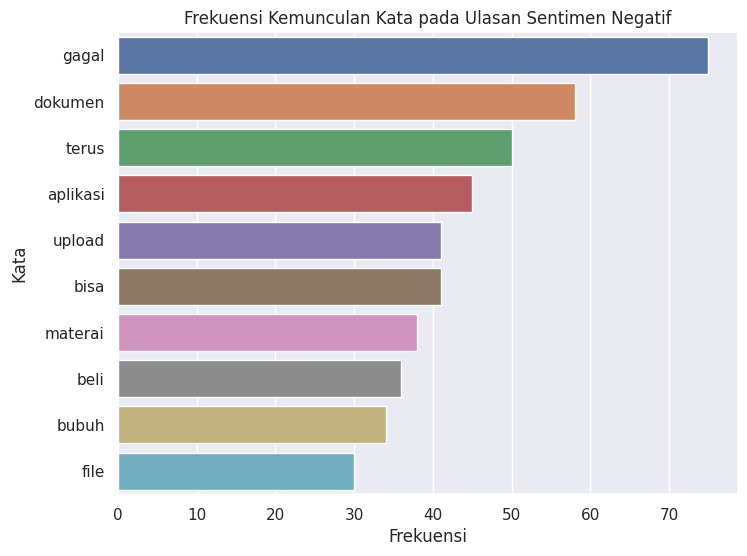

In [40]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data_final[data_final['sentimen'] == 1]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [41]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

    kata  frekuensi
   gagal         75
 dokumen         58
   terus         50
aplikasi         45
  upload         41
    bisa         41
 materai         38
    beli         36
   bubuh         34
    file         30


In [42]:
# Menghitung Jumlah Sentimen Positif, Negatif

data_final['sentimen'].value_counts()

,count
sentimen,
0,435
1,244


# **Transormation & Data Preparation**

In [43]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data_final['steamming']
y = data_final['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [44]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [45]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

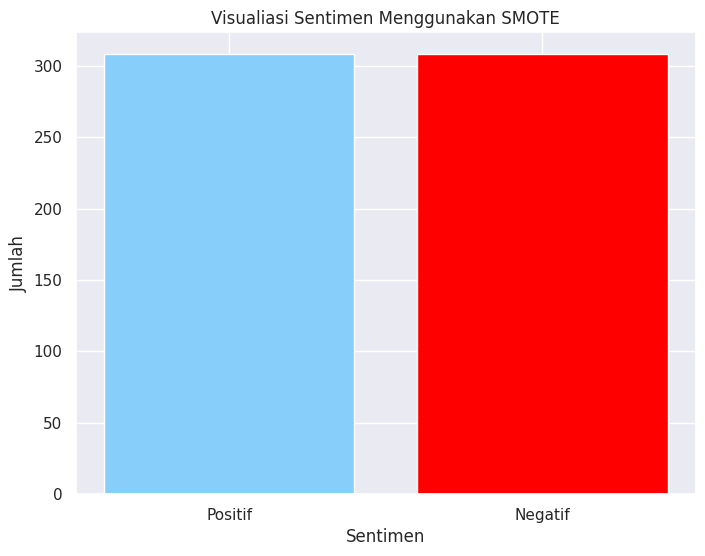

In [46]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [47]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [48]:
# Membangun Model Naive Bayes Classifier

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [49]:
y_pred = naive_bayes.predict(X_test_vec)

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [50]:
# Classification Report

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Positif', 'Negatif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.7843137254901961

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Positif       0.85      0.79      0.82       127
     Negatif       0.69      0.78      0.73        77

    accuracy                           0.78       204
   macro avg       0.77      0.78      0.78       204
weighted avg       0.79      0.78      0.79       204



In [51]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[100  27]
 [ 17  60]]

True Positives (TP) =  100

True Negatives (TN) =  60

False Positives (FP) =  27

False Negatives (FN) =  17

Accuracy =  0.7843137254901961


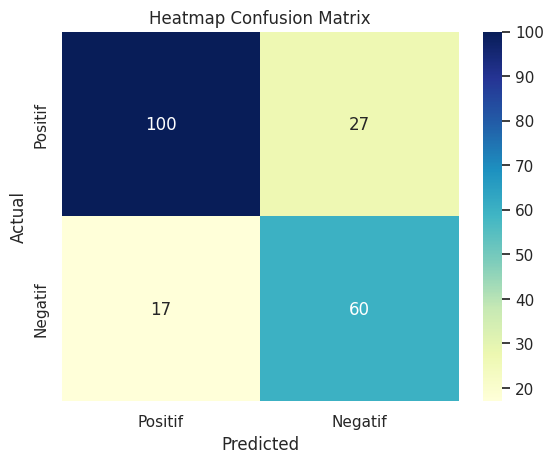

In [52]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif','Negatif'],
                         index=['Positif','Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [53]:
# Slicing Confusion Matrix

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [54]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7843


In [55]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2157


# **Testing**

In [56]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : Aplikasi ini aneh, udah beli saldo emetnya tapi setiap mau stamp dikatakan dokumen tidak valid, padahal format sudah pdf, ukuran kertas A4, dan size dokumennya ga lebih dari 900kb. Seharian nyoba ulang-ulang tetap aja dokumen tidak valid. Saya kasih bintang 1 dulu. Nanti kalau sudah bagus saya kasih bintang 5
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 67.37%
Probabilitas: 67.3741563966037 %


In [57]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Setelah dokumen dibubuhi e materai malah ketika di upload gak bisa. Kererangannya sedang perbaikan. Dari semalam perbaikan hingga subuh ini. Lama banget perbaikannya
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 60.50%
Probabilitas: 60.49549793875046 %
